# Case Study
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? 

# Problem Statement
We need to predict consultation fees. Output feature is an continuous variable, it's an regression problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Reading excel file 
train_df=pd.read_excel("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Data-Science-ML-Capstone-Projects-master/Final Participant Data Folder/Final_Train.xlsx")
test_df=pd.read_excel("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Data-Science-ML-Capstone-Projects-master/Final Participant Data Folder/Final_Test.xlsx")

In [3]:
print(train_df.shape)
print(test_df.shape)

(5961, 7)
(1987, 6)


# EDA(Exploratory Data Analysis)

In [4]:
print(train_df.columns)
print(test_df.columns)
# Fees is output feature/column.

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')
Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')


In [5]:
# Checking Missing Values
print("***********train**********")
print(train_df.isnull().sum())
print("***********test**********")
print(test_df.isnull().sum())
# In both train and test data Rating,place and Miscellaneous_Info instances are missing.

***********train**********
Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64
***********test**********
Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [6]:
# I am going to drop null values of place feature. After observing excel file observed that, all fees are equivalent to 1. 
#  Only one MBBS is there and qualification is also not correct.
train_df['Place']=train_df['Place'].dropna(axis=0)
test_df['Place']=test_df['Place'].dropna(axis=0)

In [7]:
print("***********train**********")
print(train_df.isnull().sum())
print("***********test**********")
print(test_df.isnull().sum())

***********train**********
Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64
***********test**********
Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [8]:
print(train_df.dtypes)
print(test_df.dtypes)

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object
Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object


In [9]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [10]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [11]:
# Miscellaneous_Info can be dropped as it is an accumulation of place and rating features.
# Need to remove years experience dtring from Experience column.

In [12]:
def fnGetCityName(address):
    if ',' in address:
        lIndex=address.index(',')
        return(address[lIndex+2:])
    else:
        return(address)

In [13]:
def fnGetQualification(Qual):
    if '-' in Qual:
        lIndex=Qual.index('-')
        return(Qual[:lIndex-1])
    else:
        return(Qual)

In [14]:
lIndex=train_df['Qualification'][0].index('-')
print(train_df['Qualification'][0][:lIndex-1])

BHMS, MD


In [15]:
# Replacing string values for Train data set
train_df['Experience']=train_df['Experience'].str.replace(" years experience","",case = False)
train_df['Rating']=train_df['Rating'].str.replace("%","",case = False)
# Since, I was getting an error stating that float object has no index function. So, converted the datatype first.
train_df['Place']=pd.DataFrame(map(str,train_df['Place']))
train_df['Place']=pd.DataFrame(map(fnGetCityName,train_df['Place']))
# I am storing only degress not specialization as that will be present in Profile feature
train_df['Qualification']=pd.DataFrame(map(str,train_df['Qualification']))
train_df['Qualification']=pd.DataFrame(map(fnGetQualification,train_df['Qualification']))

In [16]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD",24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD",12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS",9,NaN,Bangalore,ENT Specialist,NaN,300
3,BSc,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [17]:
train_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [18]:
# Converting Rating feature to numeric
train_df['Rating']=pd.to_numeric(train_df['Rating'])
train_df['Experience']=pd.to_numeric(train_df['Experience'])

In [19]:
# Removing Miscellaneous info, as information is present under different features.
train_df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [20]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD",24,100.0,Ernakulam,Homeopath,100
1,"BAMS, MD",12,98.0,Bangalore,Ayurveda,350
2,"MBBS, MS",9,NaN,Bangalore,ENT Specialist,300
3,BSc,12,NaN,Bangalore,Ayurveda,250
4,BAMS,20,100.0,Chennai,Ayurveda,250


In [21]:
train_df.describe()
# Seems experience feature has outliers in it.

,Experience,Rating,Fees
count,5961.000000,2659.000000,5961.000000
mean,17.303976,94.643475,307.944640
std,11.142798,7.852813,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,93.000000,150.000000
50%,14.000000,97.000000,300.000000
75%,23.000000,100.000000,500.000000
max,66.000000,100.000000,950.000000


In [22]:
train_df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place               0
Profile             0
Fees                0
dtype: int64

In [23]:
# Imputing null values for rating feature. Since it's an float feature, we will replace by mean or median.
print(train_df['Rating'].mean())
print(train_df['Rating'].median())
# I will replace null values by mean
train_df['Rating'].fillna(train_df['Rating'].median(),inplace=True)

94.64347499059797
97.0


In [24]:
train_df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [25]:
print(len(list(train_df['Qualification'].value_counts())))
# 621 distinct Qualifications are available
print(len(list(train_df['Place'].value_counts())))
# 10 differnt cities data is given to us.
print(len(list(train_df['Profile'].value_counts())))

621
11
6


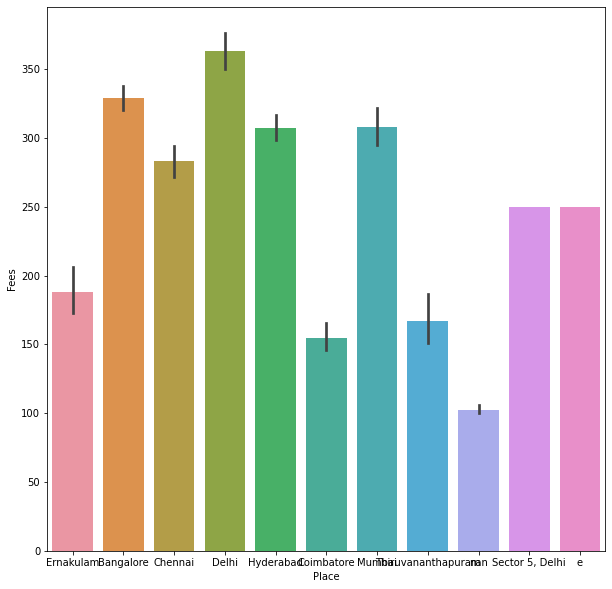

In [26]:
# Barplots
plt.figure(figsize=(10,10))
sns.barplot(x='Place',y='Fees',data=train_df)
# As expected higher fees is charged in cities like Chennai, Mimbai, Hyderabad and Bangalore

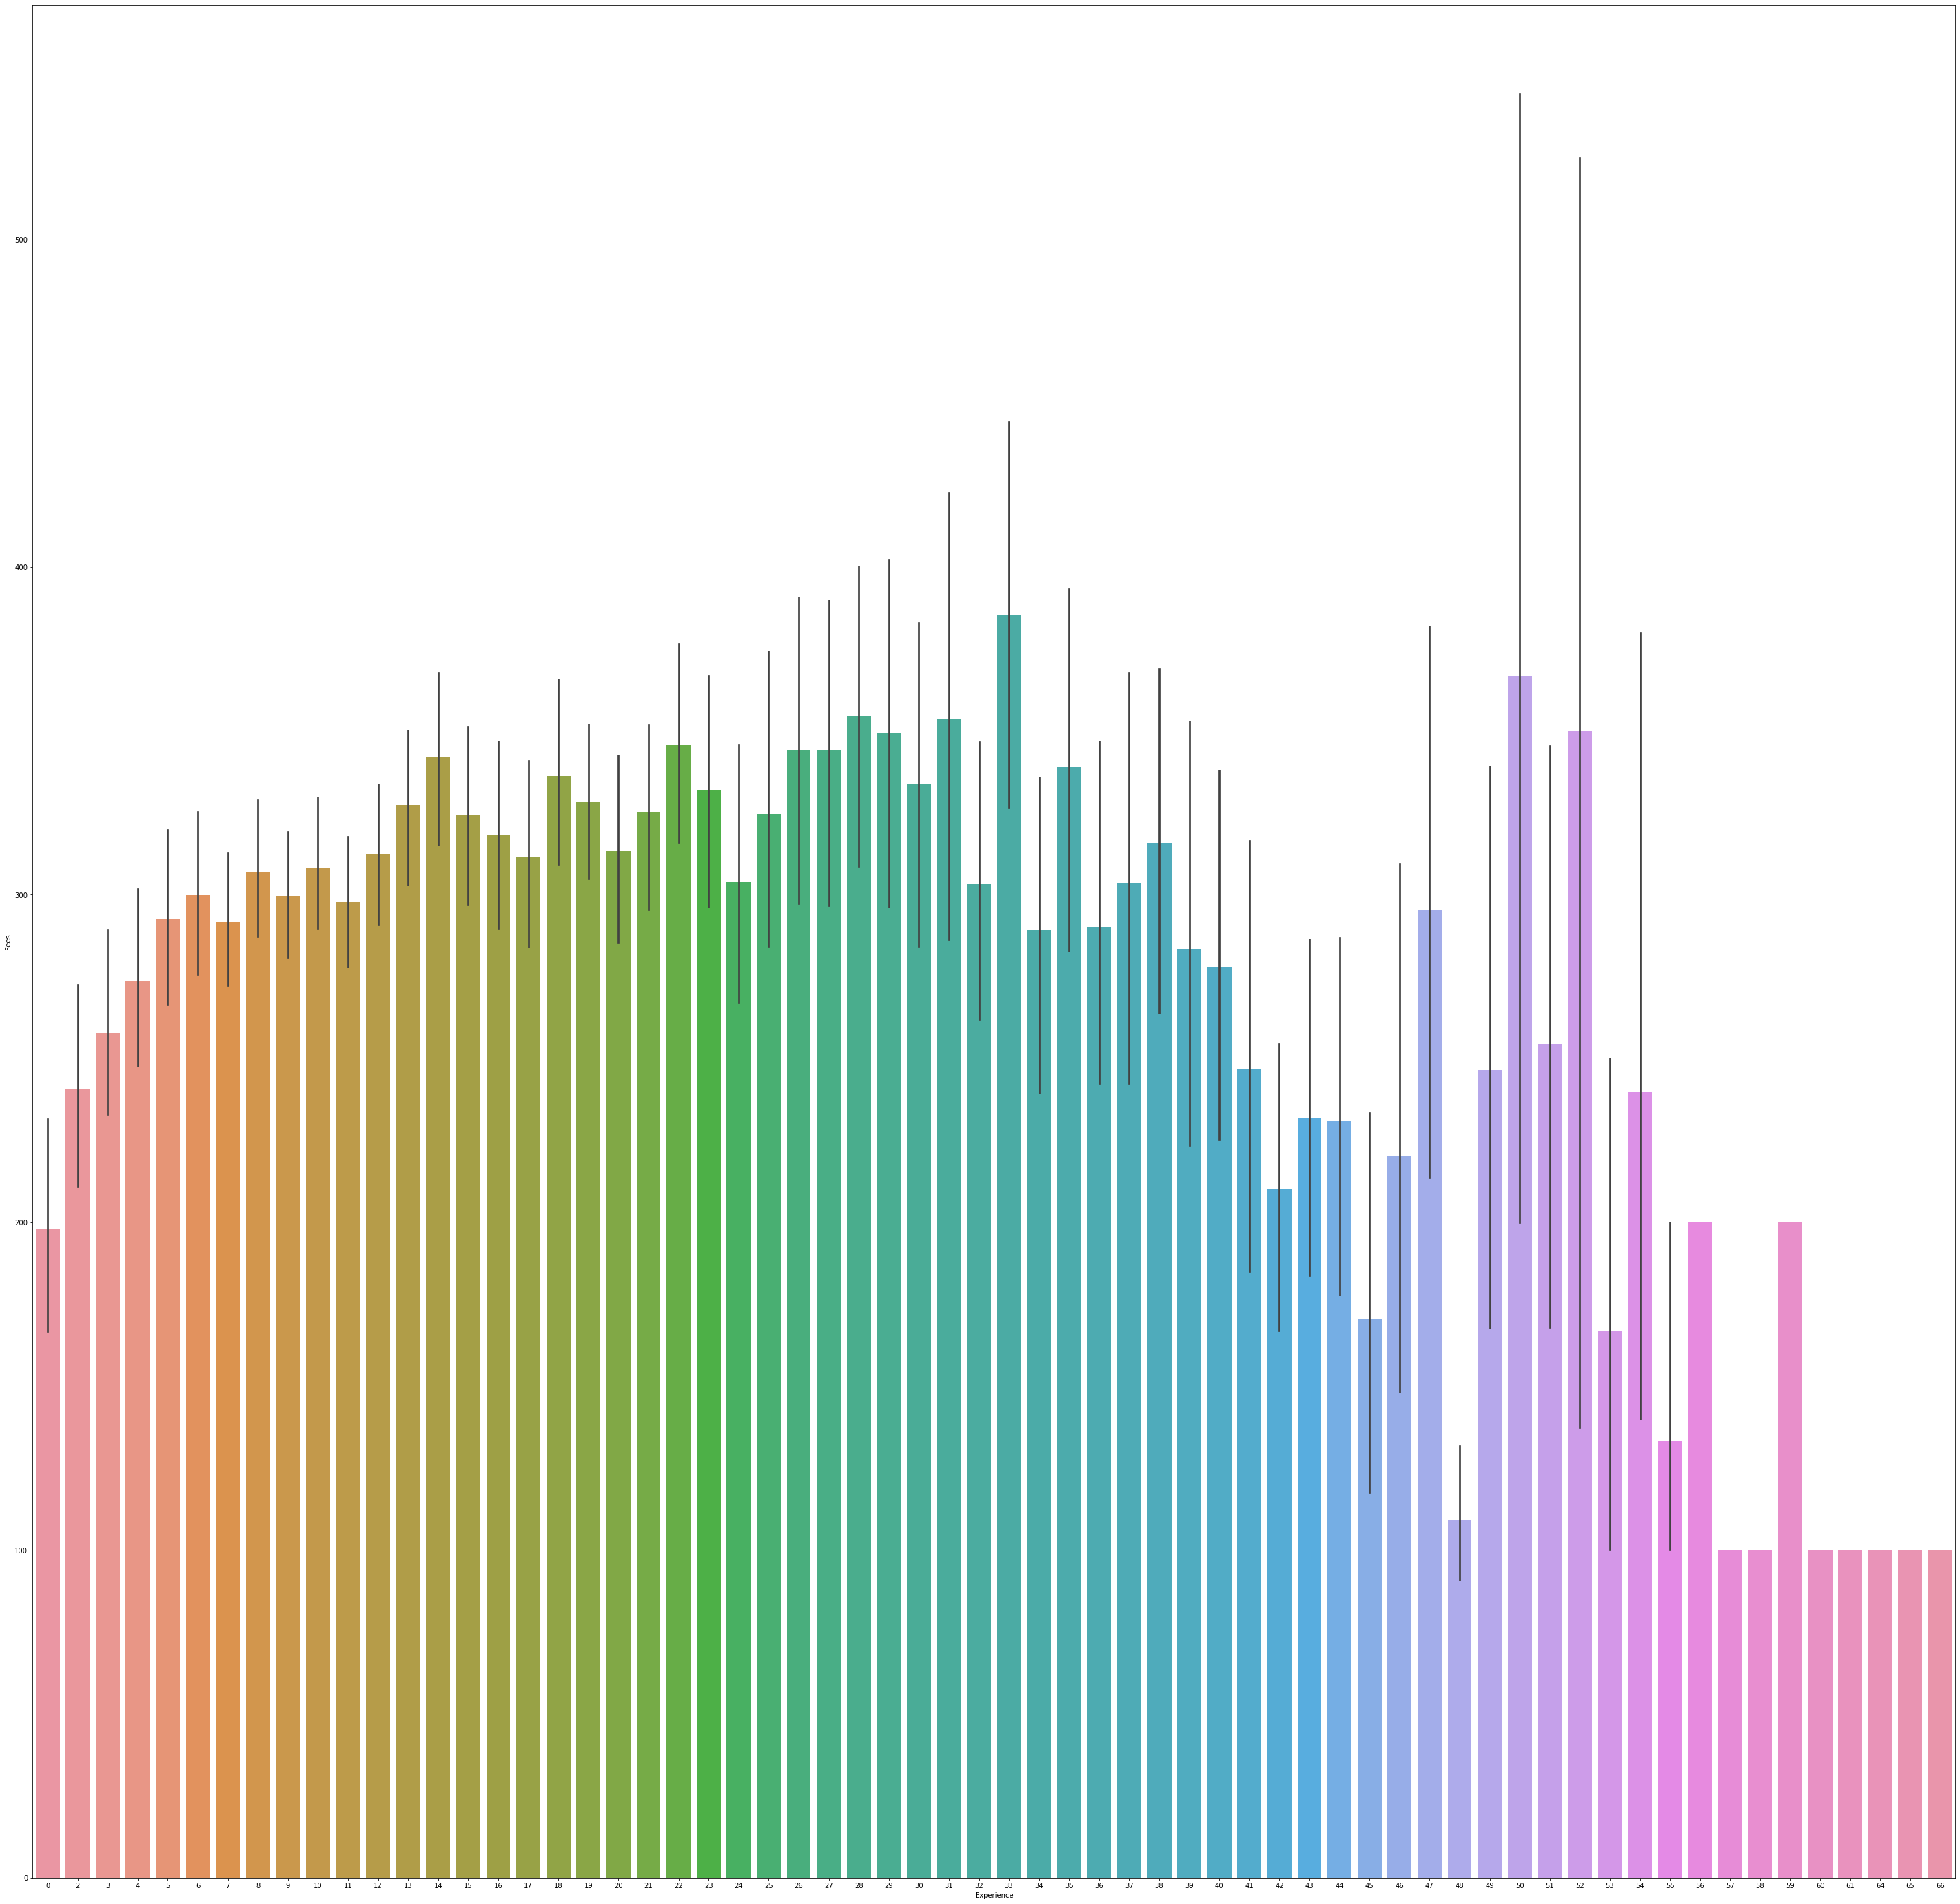

In [27]:
plt.figure(figsize=(50,50))
sns.barplot(x='Experience',y='Fees',data=train_df)
# Doctors with 5 to 30 years of experience are charging higher fees.

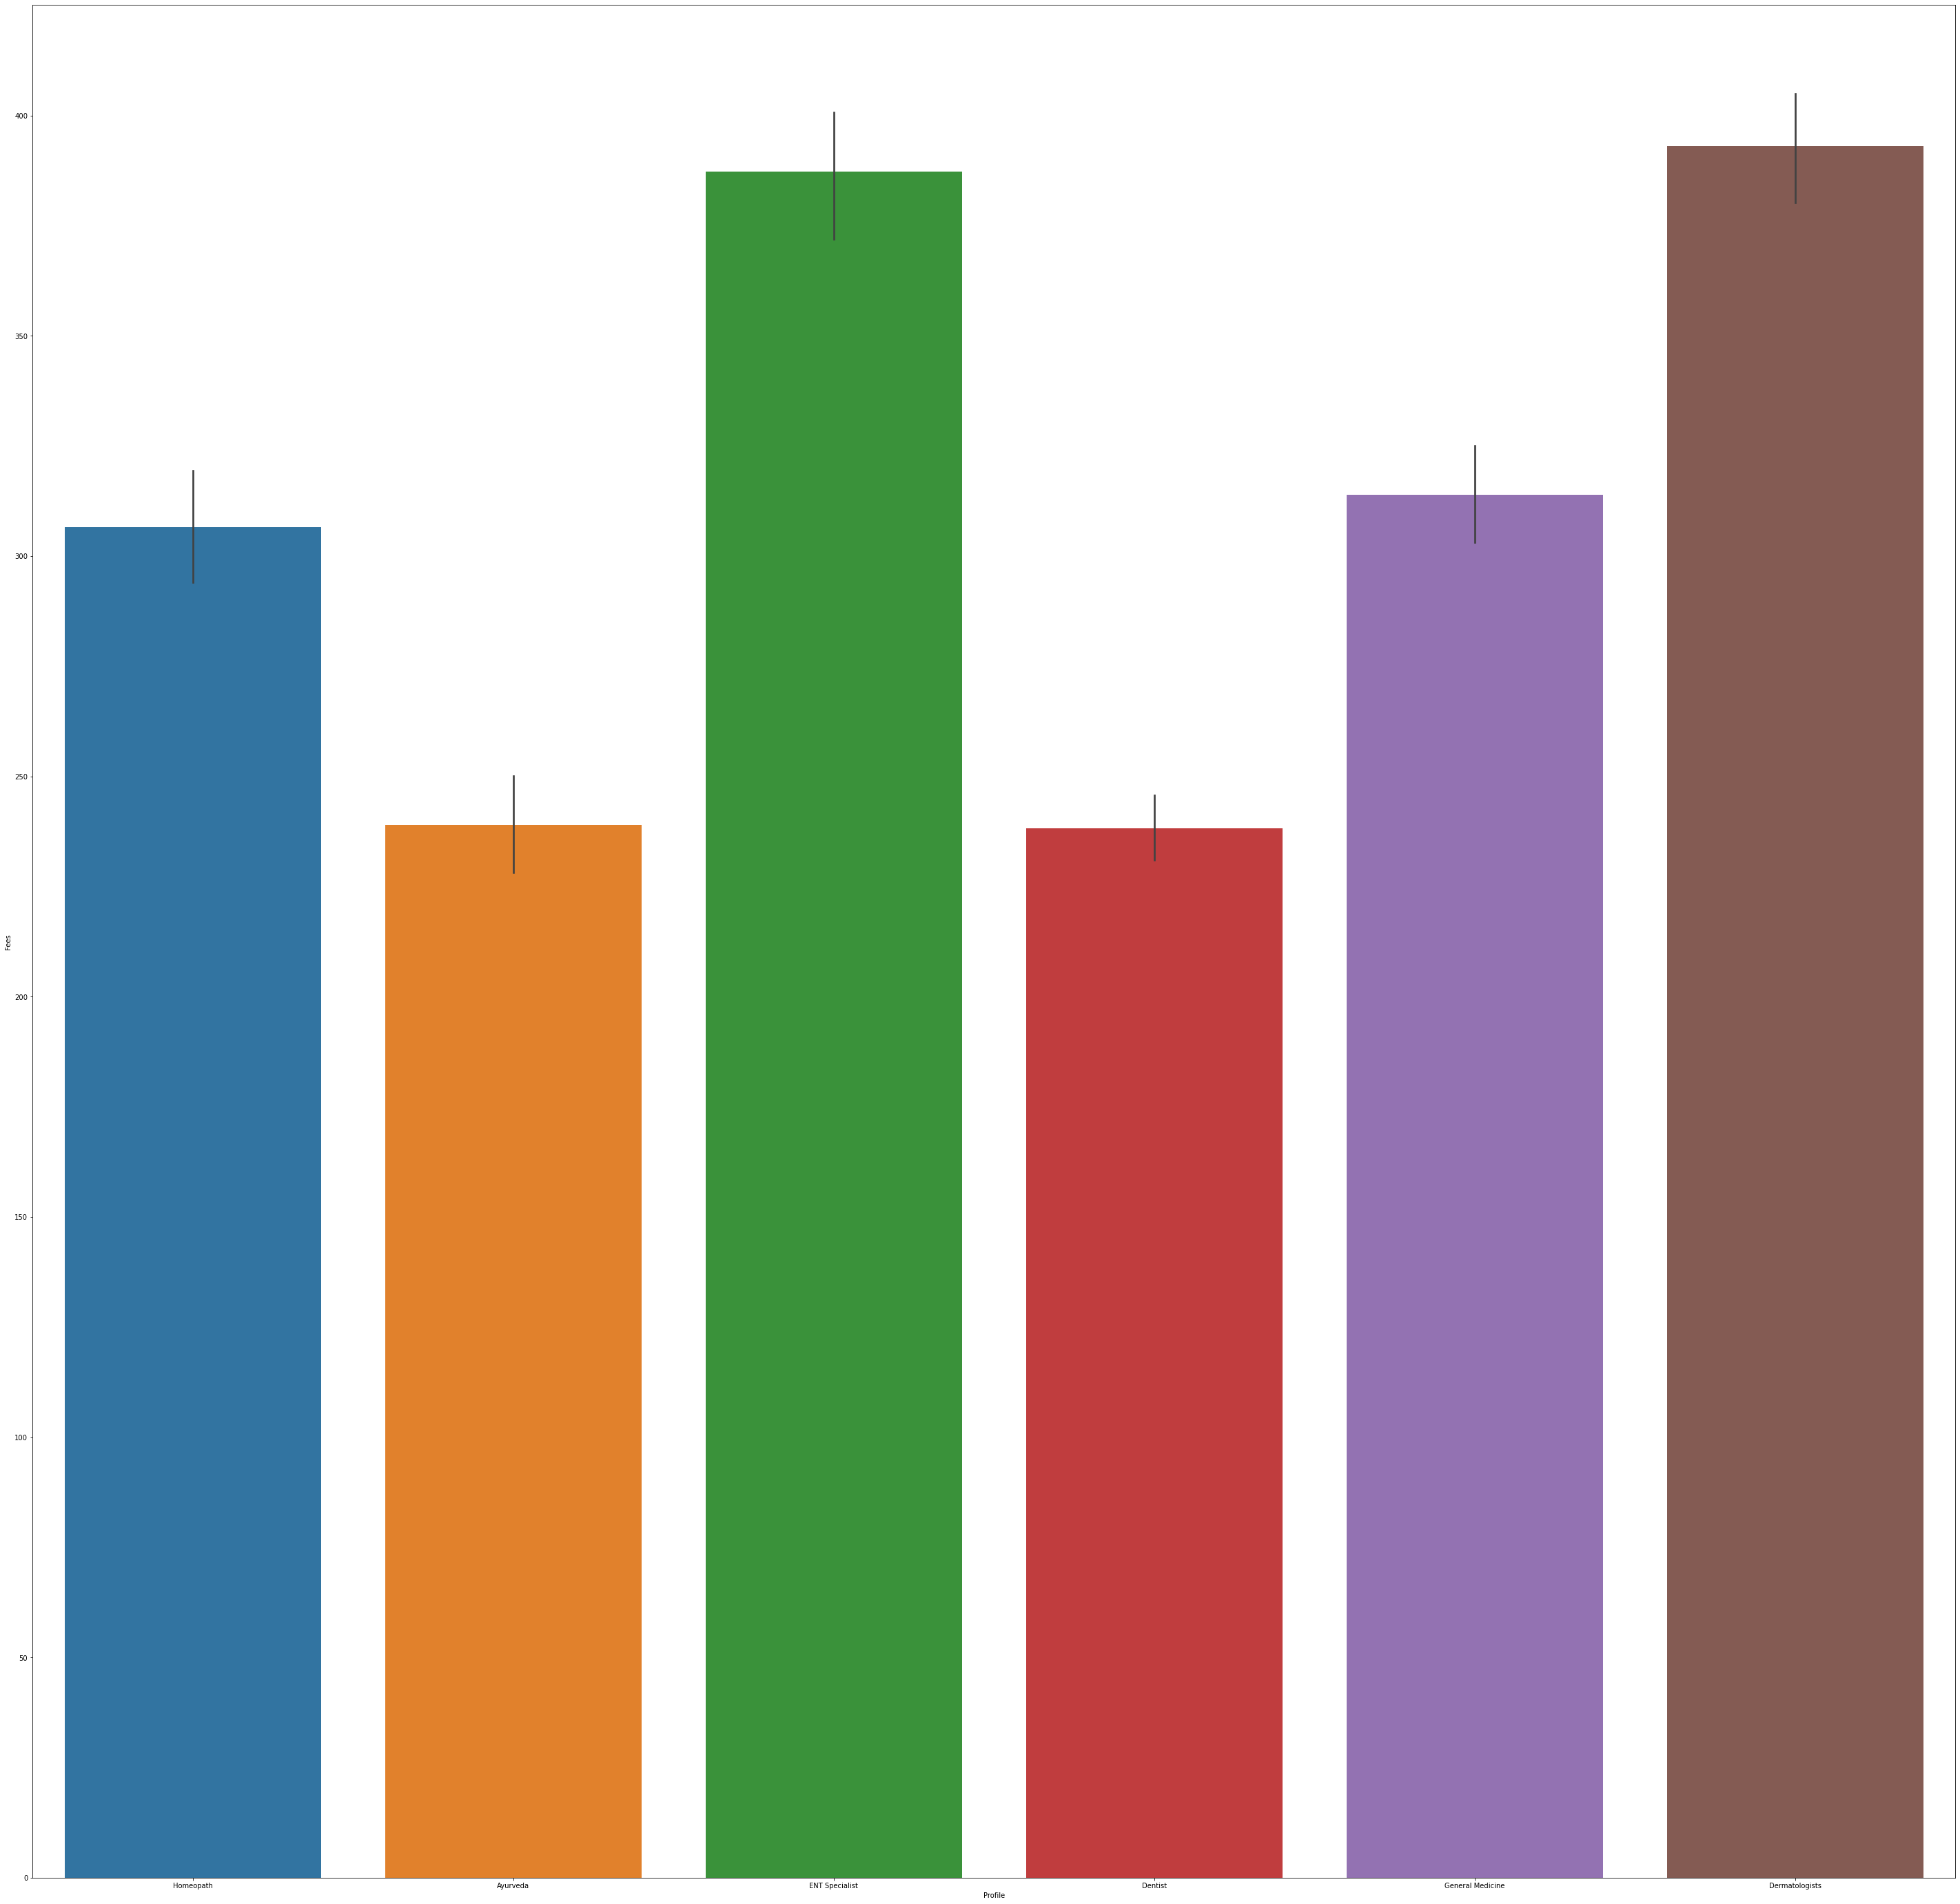

In [28]:
plt.figure(figsize=(50,50))
sns.barplot(x='Profile',y='Fees',data=train_df)
# ENT specialists and Dermatologists are charging higher fees.

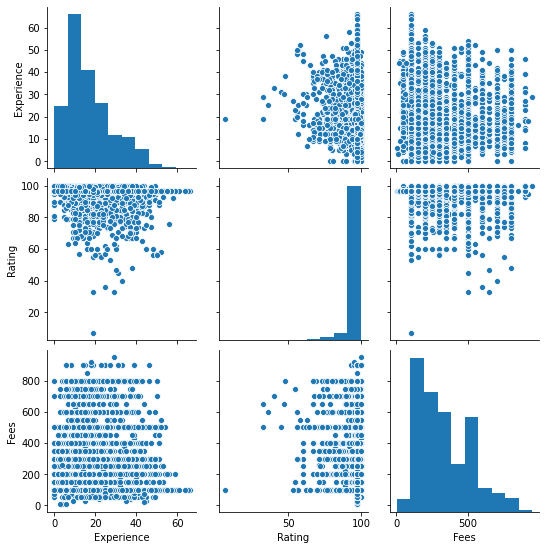

In [29]:
# Bivariate Analysis
# Plotting pairplot
sns.pairplot(data=train_df)

In [30]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD",24,100.0,Ernakulam,Homeopath,100
1,"BAMS, MD",12,98.0,Bangalore,Ayurveda,350
2,"MBBS, MS",9,97.0,Bangalore,ENT Specialist,300
3,BSc,12,97.0,Bangalore,Ayurveda,250
4,BAMS,20,100.0,Chennai,Ayurveda,250


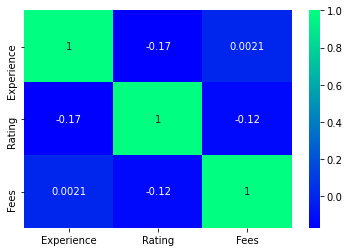

In [31]:
# Heatmap corr matrix
corr_mat=train_df.corr()
sns.heatmap(corr_mat,annot=True,cmap='winter')
# We will not remove any of the featur, as all seems important feature and not correlated to each other.

# Model Selection

In [32]:
Y=train_df['Fees']
X=train_df.drop('Fees',axis=1)

In [33]:
print(X.shape)
print(Y.shape)

(5961, 5)
(5961,)


In [34]:
# Normalization
colList=['Rating','Experience']
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [35]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
X = OrdinalEncoder().fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# Calculating root mean squared log error.
def rmlse(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [38]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=LinearRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Linear regression is giving rmlse 78 at random state 90

Best rmlse Score is 0.7801569365041532 for random state 90.


In [39]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=DecisionTreeRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Decision Tree is giving rmlse 69 at random state 74

Best rmlse Score is 0.6844561706967064 for random state 74.


In [40]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=SVR(gamma='scale')
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Support Vector is giving rmlse 79 at random state 42

Best rmlse Score is 0.7946687438126692 for random state 42.


In [41]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=AdaBoostRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# AdaBoost is giving rmlse 77 at random state 42

Best rmlse Score is 0.7690718585074756 for random state 42.


In [42]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=GradientBoostingRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Gradient Boost is giving rmlse 81 at random state 90

Best rmlse Score is 0.8122152324237977 for random state 90.


In [43]:
# Gradient Boosting Classifier is giving best result. Let's deploy it after checking it's cross val score.
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300]}
gbr=GradientBoostingRegressor()
gsgb=GridSearchCV(gbr,parameters)
gsgb.fit(X,Y)
print(gsgb.best_params_)

{'criterion': 'mse', 'n_estimators': 100}


In [44]:
from sklearn.model_selection import cross_val_score
# Gradient Boost Algorithm is giving us the best result with 99% accuracy, let's use corss validation and later prepare our final model.
cross_val_score(GradientBoostingRegressor(),X,Y,cv=5,scoring="r2").mean()
# It's a low score, model is not suffering from over or under fitting.

0.19455598789497142

In [48]:
# Max random state is coming around 90 and best model came out to be Gradient Boodting. We will create final model around that.
gbm=GradientBoostingRegressor(criterion='mse',n_estimators=100)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=90,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)

In [49]:
# Checking error and accuracy
print("r2_score is ",rmlse(pred,y_test))

r2_score is  0.8121657280917661


In [50]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_Doctor.pkl')

['GradBoost_Doctor.pkl']